A --> motos
el resto coches... quiza deberiamos hacer algo distinto para las motos!!!
Hay coches amarillos que no están en el dataset, por ejemplo!

In [5]:
import tensorflow

In [6]:
from dl_model_unet import dataset
reload(dataset)

import numpy as np
import pandas as pd

max_shape = 512
image_index = 10
test_images = 10
bsize = 5

labels_data = pd.read_csv('data/trainingObservations.csv')
data = dataset.get_labels(labels_data, {'A':'Moto', 'B':'Car', 'C':'Car', 'D':'Car', 'E':'Car', 'F':'Car', 'G':'Car', 'H':'Car', 'I':'Car'})    

cases = list(data.keys())
np.random.shuffle(cases)
train_cases, test_cases = cases[test_images:], cases[:test_images]
train_generator = dataset.chunk(train_cases, data, bsize, max_shape)
test_generator = dataset.chunk(test_cases, data, bsize, max_shape)

#for x,y in train_generator:
#    print x.shape, y.shape

In [8]:
from keras.optimizers import Adam
from dl_networks import unet
import keras.backend as K
from keras import backend as K


def max_pred(y_true, y_pred):
    return K.max(y_pred)

def dice_coef(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


model = unet.ThickUNET(input_shape=(3,max_shape,max_shape), activation='relu').model
model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=['accuracy',max_pred])
# logging.info('Loading exiting model...')
# model.load_weights(OUTPUT_MODEL)



Epoch 1/3000
40/50 [=======================>......] - ETA: 55s - loss: -0.0287 - acc: 0.3193 - max_pred: 0.5071

KeyboardInterrupt: 

In [ ]:
model.fit_generator(
                    generator=train_generator,
                    samples_per_epoch=50,  # make it small to update TB and CHECKPOINT frequently
                    nb_epoch=3000,
                    verbose=1,
                    #class_weight={0:1., 1:4.},
                    #callbacks=[tb, model_checkpoint],
                    validation_data=test_generator,  # TODO: is_training=False
                    nb_val_samples=2,
                    max_q_size=30,
                    nb_worker=1)  # a locker is needed if increased the number of parallel workers



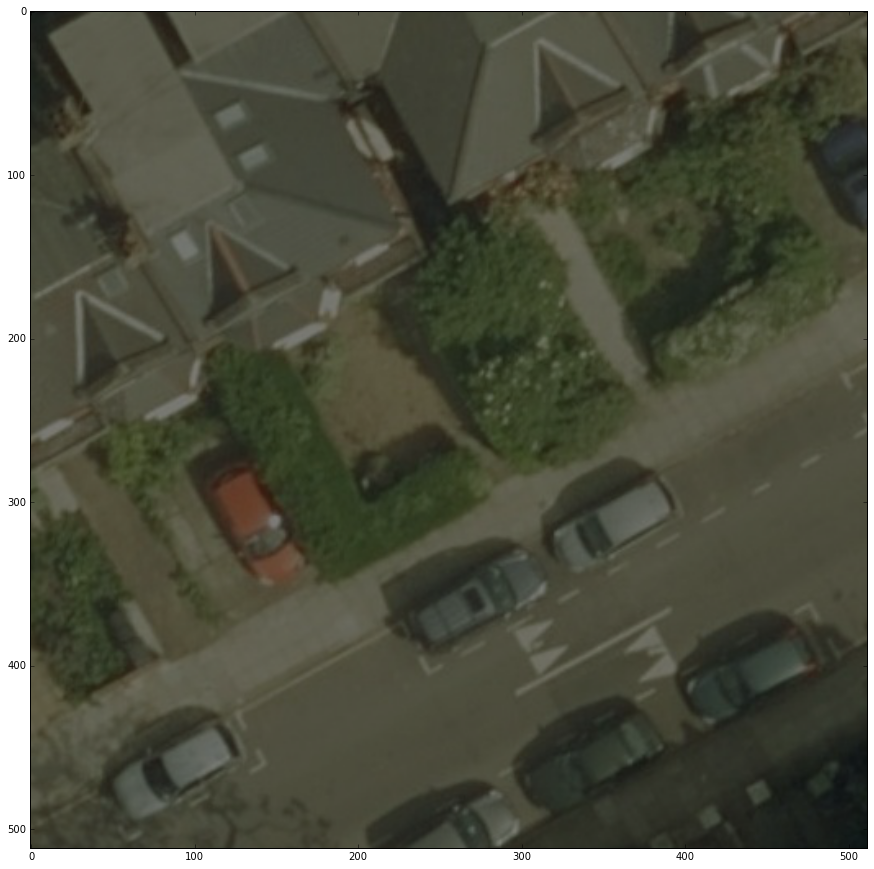

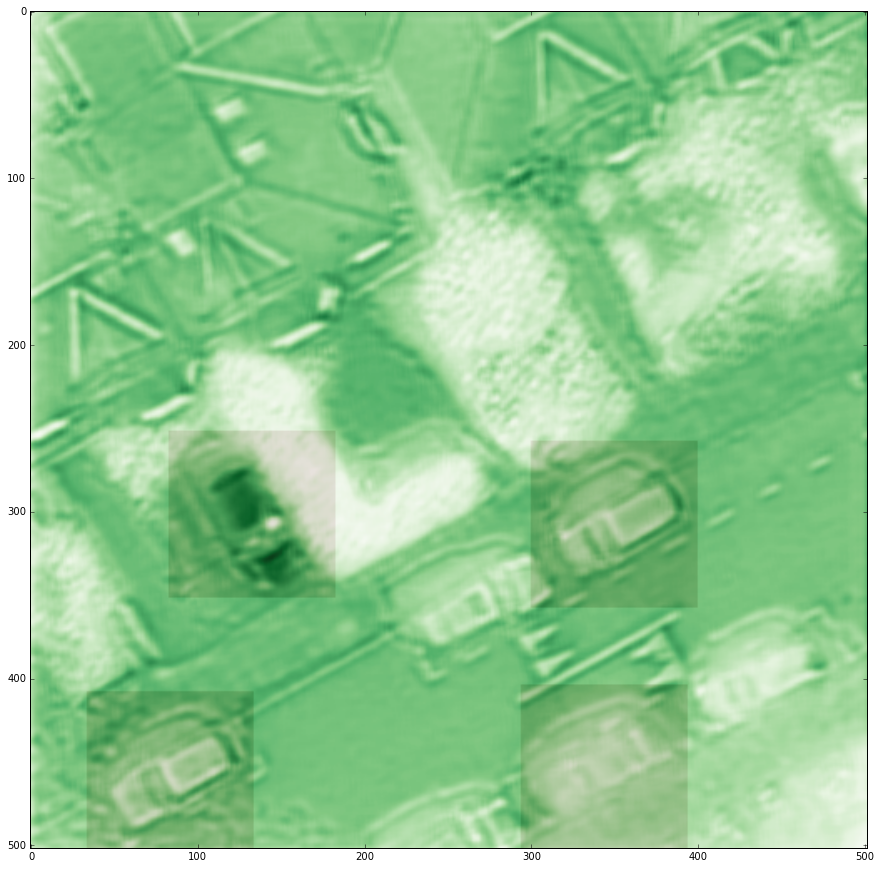

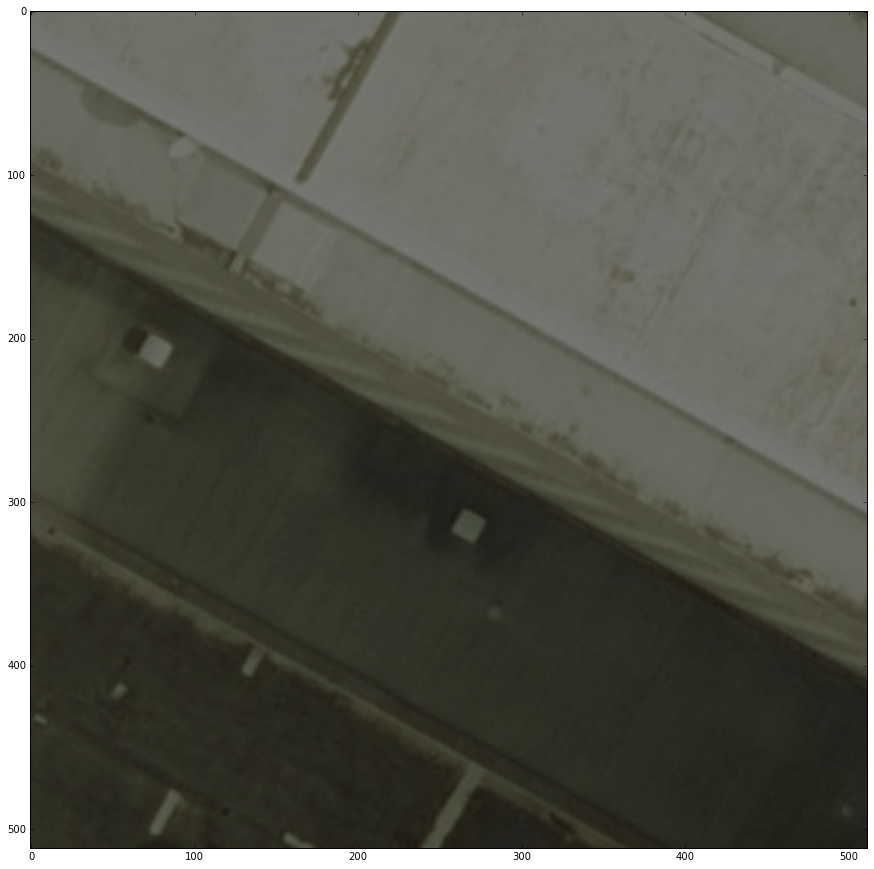

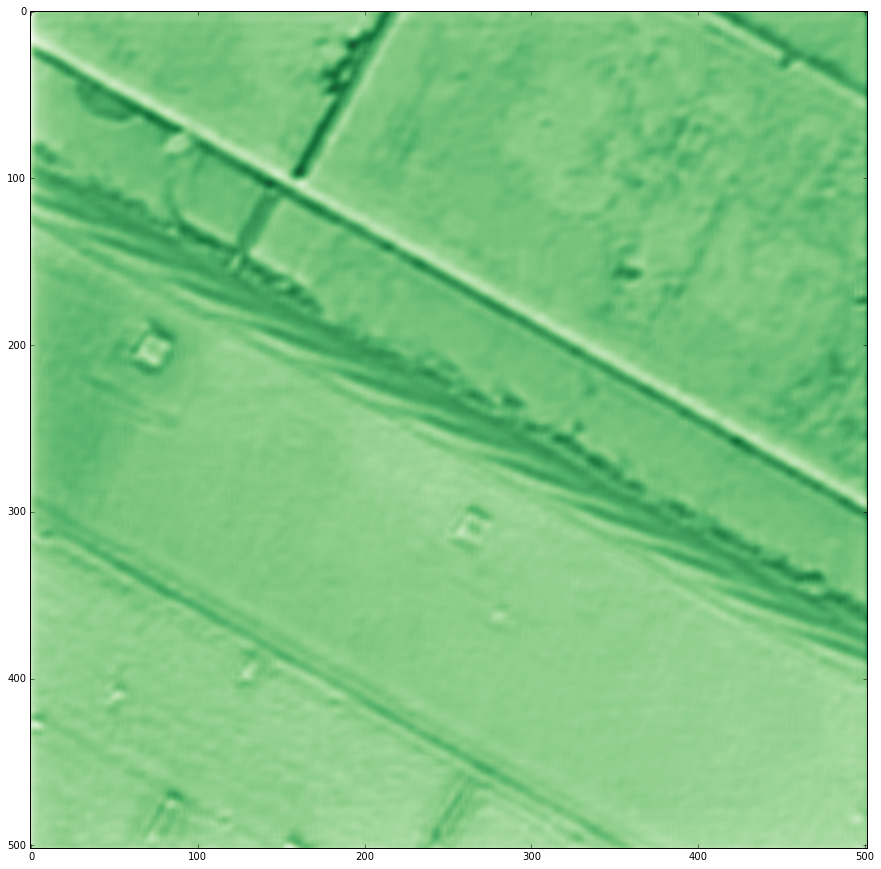

In [52]:
import pylab
from pylab import *
from scipy.signal import convolve2d


%matplotlib inline
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

for x,y in test_generator:
    preds = model.predict(x)
    
    for i in range(len(preds)):
        figure()
        imshow(x[i].transpose([1,2,0]))
        figure()

        aux = convolve2d(preds[i][0], np.ones([5,5]), mode = 'same')
        aux = (aux - aux.min()) / (aux.max() - aux.min())
        imshow(aux[5:-5,5:-5] * (aux[5:-5,5:-5] > 0), cmap = cm.Greens)
        imshow(y[i][0][5:-5,5:-5], cmap = pylab.cm.Reds, alpha = 0.1)

    break

# playing with OpenCV

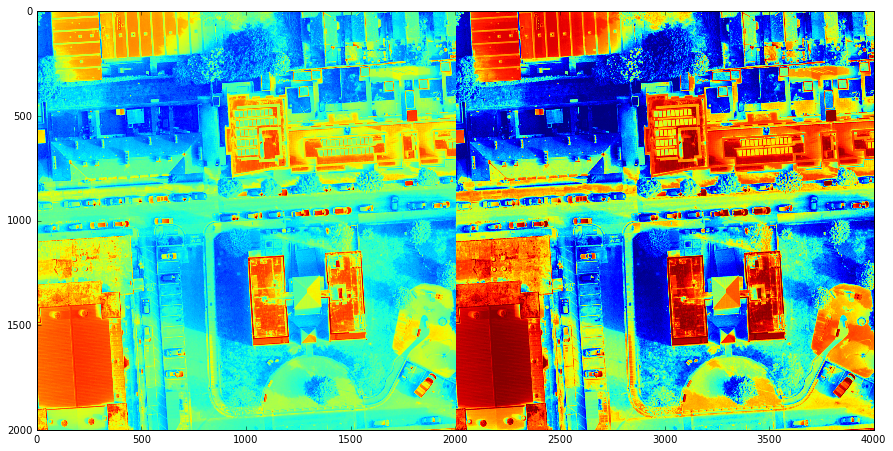

In [109]:
import cv2
img = cv2.imread('data/training/' + train_cases[0] + '.jpg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
imshow(np.asarray(res))



In [169]:
import numpy as np
import cv2

im = cv2.imread('data/training/' + train_cases[1] + '.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
thresh = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,51, 5)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im, contours, -1, (0,255,100), 1)
imshow(im, cmap=cm.Greys)


error: -------src-dir-------/opencv-2.4.10/modules/imgproc/src/color.cpp:3739: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [136]:
cv2.adaptiveThreshold?

In [167]:
cv2.threshold?